# Content Based Recommendation

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [191]:
m_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols,
encoding='latin-1')
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [192]:
# Remove space in columns
movies.columns = movies.columns.str.replace(" ", "_")
movies.columns = movies.columns.str.replace("'", "")

In [193]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Seems like video release date has all entries missing

In [194]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [195]:
movies.movie_title.fillna("", inplace=True)

(-0.5, 499.5, 299.5, -0.5)

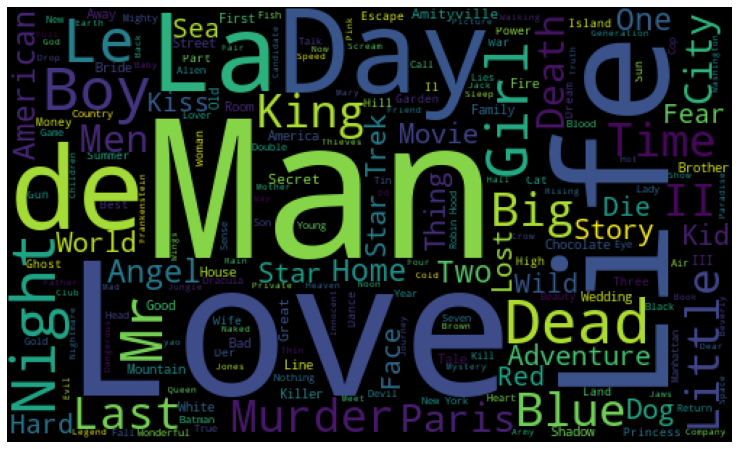

In [196]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

title_corpus = ' '.join(movies.movie_title)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", width=500, height=300).generate(title_corpus)

plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis("off")

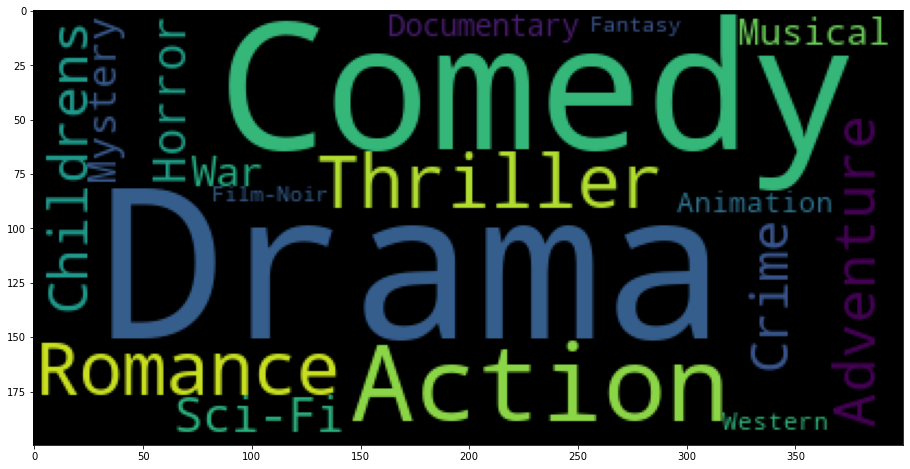

In [197]:
genre_counts = movies.loc[:, "Action": ].sum()
genre_wordcloud = WordCloud().generate_from_frequencies(genre_counts)

plt.figure(figsize=(16, 8))
plt.imshow(genre_wordcloud)

In [333]:
from sklearn.metrics.pairwise import cosine_similarity

X = movies.loc[:, "Action":]
sim_matrix = cosine_similarity(X)
sim_df = pd.DataFrame(sim_matrix, index=movies.movie_id, columns=movies.movie_id)
indices = pd.Series(movies.index, index=movies.movie_title)


In [290]:
# TODO: Recommendation of more than one movie, return as a dataframe
def recommend(title, n=5):
    idx = indices[title]
    sim_scores = list(enumerate(sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores if i[0] != idx]
    
    return movies.movie_title.iloc[movie_indices[0:n]]


In [294]:
title = 'Basic Instinct (1992)'

In [296]:
u_cols = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("data/ml-100k/u.user", sep="|", names=u_cols, encoding="latin-1")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [297]:
r_cols = ["user_id", "movie_id", "rating", "unix_timestamp"]
ratings = pd.read_csv("data/ml-100k/u.data", names=r_cols, sep="\t", encoding="latin-1")
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [326]:
mov_rat = ratings.merge(movies, on='movie_id', how='left')
mov_rat.head()

,user_id,movie_id,rating,unix_timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
user_profile = mov_rat.groupby('user_id').mean().loc[:, "Action":]

In [334]:
movies_vector = movies.loc[:, "Action":]

In [340]:
user_mov_sim  = user_profile.dot(movies_vector.T)
user_mov_sim = user_mov_sim.apply(lambda r: r/r.sum(), axis=0)

In [351]:
user_mov_sim

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.001342,0.001035,0.000826,0.001114,0.000956,0.001000,0.001072,0.001147,0.001000,0.000987,...,0.000978,0.001000,0.001000,0.001000,0.001000,0.001000,0.000828,0.000944,0.001279,0.001000
2,0.000966,0.000672,0.000836,0.001092,0.001277,0.001436,0.001223,0.001241,0.001436,0.001247,...,0.000743,0.001436,0.001436,0.001436,0.001436,0.001436,0.001060,0.001399,0.000987,0.001436
3,0.000634,0.001203,0.001679,0.000987,0.001388,0.001036,0.001080,0.000881,0.001036,0.001017,...,0.001357,0.001036,0.001036,0.001036,0.001036,0.001036,0.001130,0.000851,0.000850,0.001036
4,0.000475,0.001597,0.001979,0.000833,0.001237,0.000636,0.000972,0.000583,0.000636,0.000678,...,0.001658,0.000636,0.000636,0.000636,0.000636,0.000636,0.001369,0.000638,0.000637,0.000636
5,0.002036,0.001028,0.000469,0.001047,0.000444,0.000392,0.000666,0.001103,0.000392,0.000477,...,0.000898,0.000392,0.000392,0.000392,0.000392,0.000392,0.000509,0.000447,0.001792,0.000392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.000989,0.001360,0.001058,0.001156,0.000952,0.000934,0.001031,0.000971,0.000934,0.000872,...,0.001282,0.000934,0.000934,0.000934,0.000934,0.000934,0.001053,0.000972,0.001171,0.000934
940,0.001306,0.000856,0.000807,0.001173,0.000991,0.001141,0.001217,0.001242,0.001141,0.001198,...,0.000842,0.001141,0.001141,0.001141,0.001141,0.001141,0.000965,0.001145,0.001501,0.001141
941,0.001555,0.001818,0.001374,0.001110,0.000835,0.000578,0.001148,0.000890,0.000578,0.000555,...,0.001618,0.000578,0.000578,0.000578,0.000578,0.000578,0.000853,0.000464,0.001217,0.000578
